<a href="https://colab.research.google.com/github/SaurabhTiwari7757/CREDIT-LOAN-DEFAULTER/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from zipfile import ZipFile
  
with ZipFile("/content/drive/MyDrive/application_record.csv.zip", 'r') as zObject:
    zObject.extractall(path="/content/drive/MyDrive/cred_card")

In [3]:
with ZipFile("/content/drive/MyDrive/credit_record.csv.zip", 'r') as zObject:
    zObject.extractall(path="/content/drive/MyDrive/cred_card")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
app_df = pd.read_csv(r'/content/drive/MyDrive/cred_card/application_record.csv')
credit_df = pd.read_csv(r'/content/drive/MyDrive/cred_card/credit_record.csv')

In [6]:
app_df.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
170652,6592242,F,N,Y,0,166500.0,State servant,Higher education,Single / not married,House / apartment,-15288,-8335,1,0,1,0,Core staff,1.0
322611,6276997,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20450,365243,1,0,0,0,NaN,1.0
294327,6259138,F,Y,Y,0,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-18718,-3108,1,0,0,0,Core staff,2.0
167677,5791547,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21979,365243,1,0,1,0,NaN,2.0
73117,5271386,F,Y,Y,1,90000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13893,-661,1,0,0,1,NaN,3.0


In [7]:
# credit_df = pd.merge(app_df,credit_df,how = 'right', on='ID')
# credit_df = pd.merge(app_df,credit_df,how='outer',on='ID')
# credit_df.shape

In [8]:
# combined_df = pd.concat([app_df,credit_df])
# combined_df.shape

In [9]:
#credit_df[credit_df.ID.isin(app_df.ID)]

In [10]:
credit_df = pd.merge(app_df,credit_df,how = 'right', on='ID')
credit_df.shape

(1048575, 20)

In [11]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1048575 non-null  int64  
 1   CODE_GENDER          777715 non-null   object 
 2   FLAG_OWN_CAR         777715 non-null   object 
 3   FLAG_OWN_REALTY      777715 non-null   object 
 4   CNT_CHILDREN         777715 non-null   float64
 5   AMT_INCOME_TOTAL     777715 non-null   float64
 6   NAME_INCOME_TYPE     777715 non-null   object 
 7   NAME_EDUCATION_TYPE  777715 non-null   object 
 8   NAME_FAMILY_STATUS   777715 non-null   object 
 9   NAME_HOUSING_TYPE    777715 non-null   object 
 10  DAYS_BIRTH           777715 non-null   float64
 11  DAYS_EMPLOYED        777715 non-null   float64
 12  FLAG_MOBIL           777715 non-null   float64
 13  FLAG_WORK_PHONE      777715 non-null   float64
 14  FLAG_PHONE           777715 non-null   float64
 15

In [12]:
credit_df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,1.048575e+06,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,537667,777715.000000,1.048575e+06,1048575
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,NaN,NaN,NaN,NaN,131572,NaN,NaN,442031
mean,5.068286e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,NaN,2.208837,-1.913700e+01,NaN
std,4.615058e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,NaN,0.907380,1.402350e+01,NaN
min,5.001711e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-6.000000e+01,NaN
25%,5.023644e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-2.900000e+01,NaN
50%,5.062104e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,-1.700000e+01,NaN
75%,5.113856e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,-7.000000e+00,NaN


In [13]:
Float_types = credit_df.select_dtypes('float64').columns.to_list()
Float_types

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [14]:
credit_df[Float_types].sample(3)

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
59248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
credit_df.isnull().sum()

ID                          0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
OCCUPATION_TYPE        510908
CNT_FAM_MEMBERS        270860
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [16]:
credit_df.isnull().sum()/credit_df.isnull().count() * 100

ID                      0.000000
CODE_GENDER            25.831247
FLAG_OWN_CAR           25.831247
FLAG_OWN_REALTY        25.831247
CNT_CHILDREN           25.831247
AMT_INCOME_TOTAL       25.831247
NAME_INCOME_TYPE       25.831247
NAME_EDUCATION_TYPE    25.831247
NAME_FAMILY_STATUS     25.831247
NAME_HOUSING_TYPE      25.831247
DAYS_BIRTH             25.831247
DAYS_EMPLOYED          25.831247
FLAG_MOBIL             25.831247
FLAG_WORK_PHONE        25.831247
FLAG_PHONE             25.831247
FLAG_EMAIL             25.831247
OCCUPATION_TYPE        48.724030
CNT_FAM_MEMBERS        25.831247
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

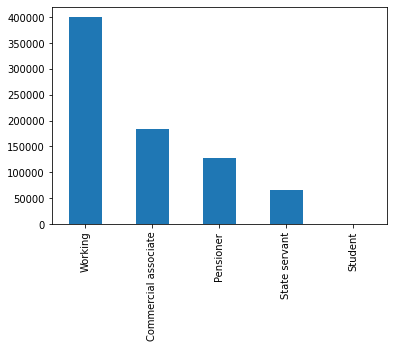

In [17]:
credit_df.NAME_INCOME_TYPE.value_counts().plot(kind = 'bar')

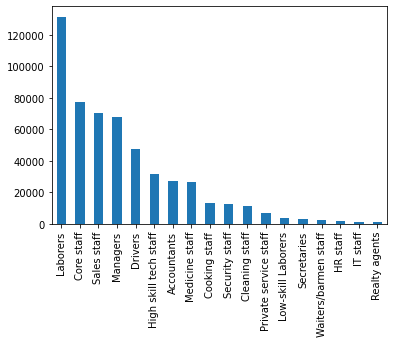

In [18]:
credit_df.OCCUPATION_TYPE.value_counts().plot(kind='bar')

In [25]:
#ID is not required
#FLAG mob has 0 variance
#Count of Children not reqd as we have fam members count
credit_df.drop(['ID','FLAG_MOBIL','CNT_CHILDREN'],axis=1,inplace = True)

In [26]:
#credit_df[['CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_WORK_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','Marital_Status']].astype('int64')

In [27]:
credit_df.sample(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
87339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-53,0
695442,F,Y,Y,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22504.0,365243.0,0.0,1.0,0.0,NaN,1.0,-5,0
443263,M,Y,Y,193500.0,Working,Secondary / secondary special,Married,House / apartment,-10439.0,-2250.0,1.0,0.0,0.0,Core staff,3.0,-2,0
880790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
11578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16,0


In [28]:
credit_df['NAME_FAMILY_STATUS'].value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [29]:
credit_df["Marital_Status"]=credit_df["NAME_FAMILY_STATUS"].replace({"Married":2,"Civil marriage":2,"Separated":1,"Widow":1,"Single / not married":1})

In [30]:
credit_df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'MONTHS_BALANCE', 'STATUS', 'Marital_Status'],
      dtype='object')

In [31]:
credit_df['CNT_FAM_MEMBERS'].value_counts()

2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

In [32]:
credit_df['DAYS_BIRTH'] = credit_df['DAYS_BIRTH'].fillna(0)

In [48]:
pd.set_option('display.max_rows',200)

In [53]:
credit_df['Age'] = abs(round(credit_df['DAYS_BIRTH']/365,2).astype('int64'))
credit_df['Age']

0           0
1           0
2           0
3           0
4           0
           ..
1048570    53
1048571    53
1048572    53
1048573    53
1048574    53
Name: Age, Length: 1048575, dtype: int64

In [1]:
round(14667.0/365,2)

40.18

In [34]:
20216.0/365

55.38630136986301

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


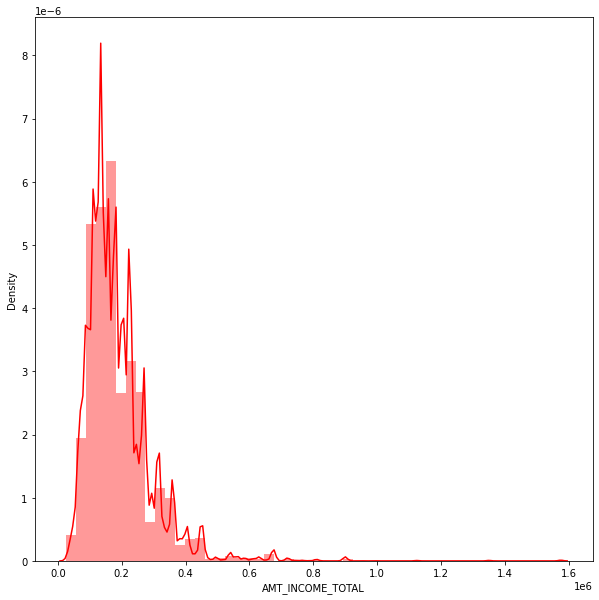

In [55]:
plt.figure(figsize=(10,10))
sns.distplot(credit_df['AMT_INCOME_TOTAL'],color='red')

In [57]:
median = credit_df['AMT_INCOME_TOTAL'].median()
credit_df['AMT_INCOME_TOTAL']=credit_df['AMT_INCOME_TOTAL'].fillna(median)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


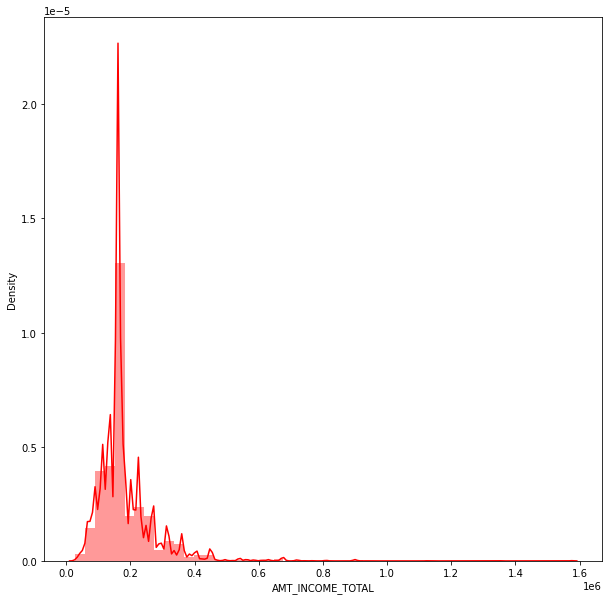

In [58]:
plt.figure(figsize=(10,10))
sns.distplot(credit_df['AMT_INCOME_TOTAL'],color='red')

In [ ]:
# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)